# Отток клиентов

## 1. Получение данных

Импорт библиотек.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    roc_curve,
    recall_score
)
from sklearn.utils import shuffle

Откроем файл `Churn.csv`, сохраним его в переменной `df` и посмотрим первые 5 строк таблицы.

In [2]:
df = pd.read_csv('Churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Посмотрим общую информацию о данных таблицы `df`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Всего в таблице 14 столбцов.
Разберём, какие в `df` столбцы и какую информацию они содержат:

**Признаки:**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**
- `Exited` — факт ухода клиента

Посмотрим общую информацию о датафрейме.

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


Проверим, есть ли в данных полные дубликаты.

In [5]:
df.duplicated().sum()

0

Полные дубликаты отсутствуют.

Построим гистограммы и посмотрим на распределение данных.

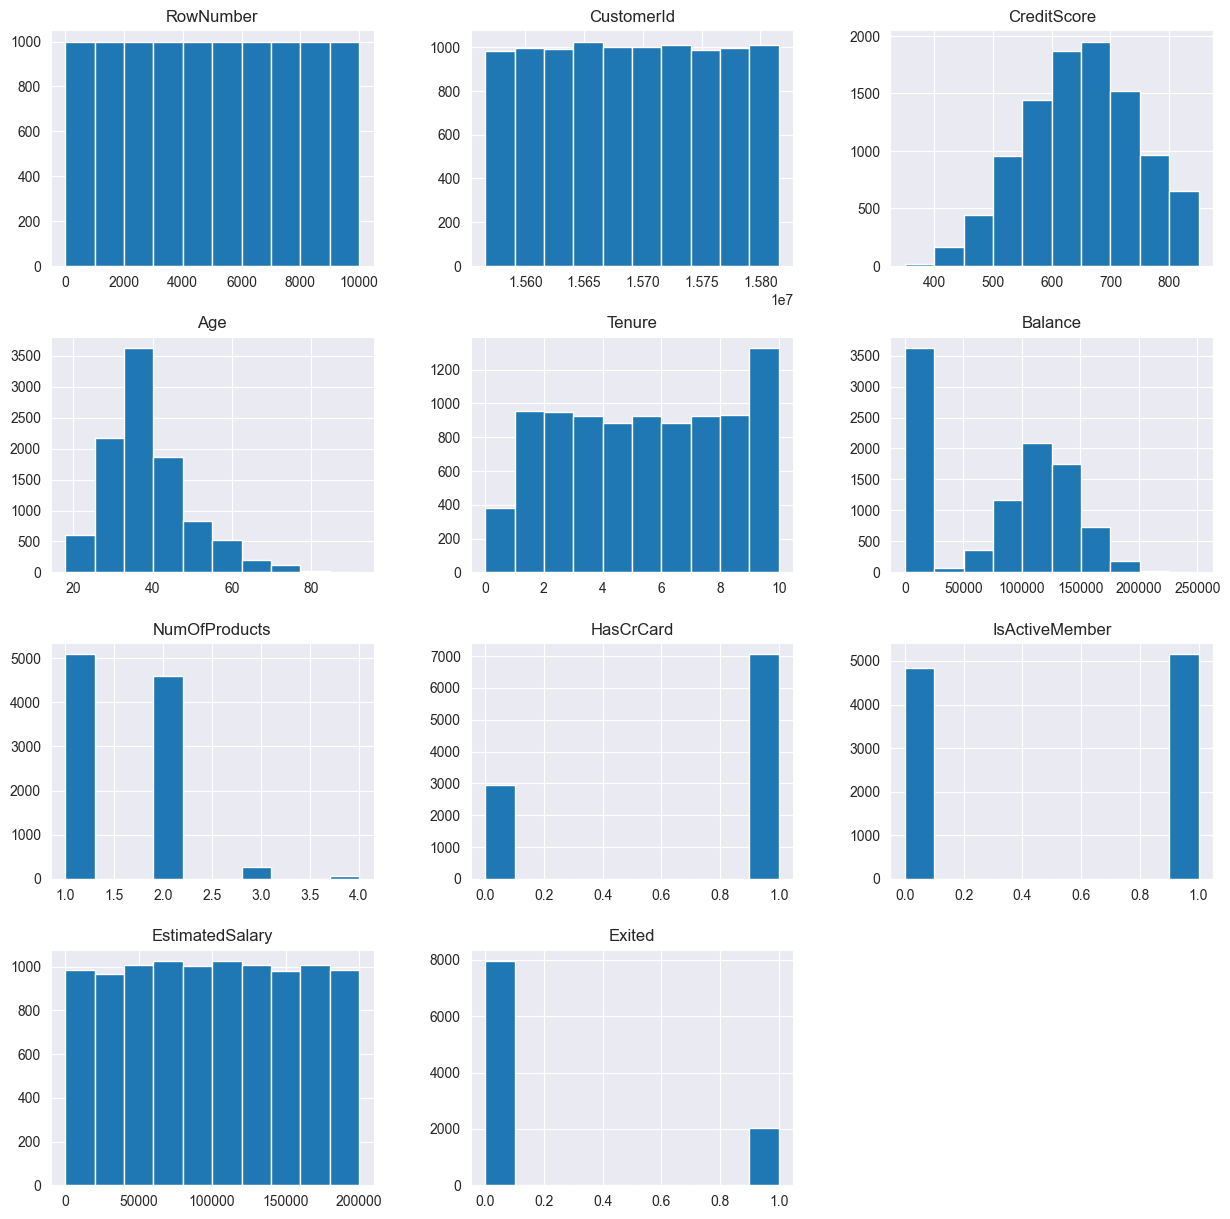

In [6]:
df.hist(figsize=(15, 15));

Посмотрим, присутствует ли в данных мультиколлинеарность.

In [7]:
df.corr(method='spearman')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.007650,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.021410,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.000604,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.014275,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.007650,-0.021410,0.000604,-0.014275,1.000000,-0.005252,0.011453,0.027293,-0.032596,0.010343,-0.016762
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.005252,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.011453,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.027293,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.032596,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.010343,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


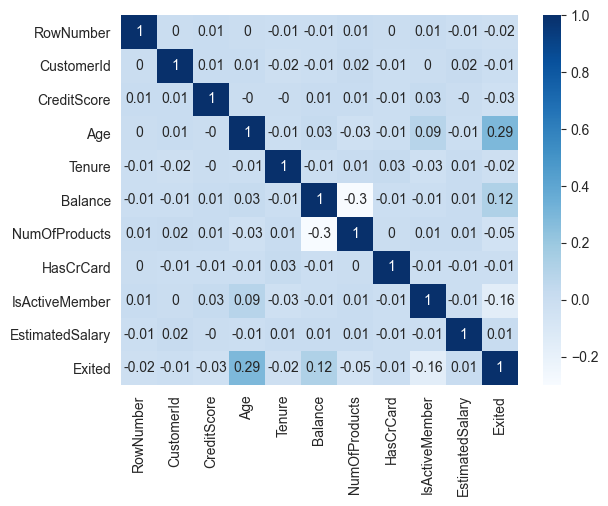

In [8]:
sns.heatmap(df.corr().round(2), cmap="Blues", annot=True);

Мультиколлинеарность отсутствует.

### Вывод

Первое представление о данных получено. Можно сделать следующие выводы:
- В таблице 14 столбцов и 10000 строк.
- Необходимо привести наименования признаков к змеиному регистру.
- В столбце `Tenure` есть пропуски, которые необходимо будет обработать далее.
- Судя по данным, для обучения модели нам понадобятся не все столбцы - необходимо будет удалить столбцы `RowNumber`, `CustomerId` и `Surname`.

## 2. Предобработка данных

Удалим столбцы, которые не понадобятся нам для обучения модели.

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Приведем наименования признаков к змеиному регистру.

In [10]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Посмотрим на значения целевого признака.

In [11]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

В целевом признаке присутствует довольно сильный дисбаланс.

Займемся пропусками в столбце `tenure`.

In [12]:
print('Количество пропусков: ', df['tenure'].isna().sum())
print('Процент пропусков: ', round((df['tenure'].isna().sum()/df['tenure'].count() * 100), 2), '%')

Количество пропусков:  909
Процент пропусков:  10.0 %


В столбце пропущено 10% данных - это довольно много, да и выборка у нас небольшая. Не будем удалять эти строки. Посмотрим, какие значения присутствуют в столбце.

In [13]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Данные в столбце распределены от 0 до 10, без выбросов. Заменим пропуски медианой, изменим тип данных на целочисленный и посмотрим, какие получились данные.

In [14]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['tenure'] = df['tenure'].astype('int64')
df['tenure'].value_counts()

5     1836
1      952
2      950
8      933
3      928
7      925
4      885
9      882
6      881
10     446
0      382
Name: tenure, dtype: int64

Еще раз посмотрим общую информацию о данных таблицы `df`.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Рассмотрим признаки с типом данных `object` (столбцы `geography` и `gender`).

In [16]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

Никаких "неожиданных" значений в столбце нет - только 2 пола.

In [17]:
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

В данных представлено всего 3 страны.

### Вывод

На этапе предобработки данных была проведена следующая работа:
- Названия столбцов приведены к змеиному регистру.
- Удалены признаки, которые не понадобятся нам для обучения модели.
- Пропуски в столбце `tenure` заполнены медианным значением, тип данных изменен на целочисленный.
- В целевом признаке `exited` присутствует дисбаланс, что необходимо будет учесть при построении моделей.

Категориальные признаки:
- `geography`
- `gender`
- `has_cr_card`
- `is_active_member`

Количественные признаки:
- `credit_score`
- `age`
- `tenure`
- `balance`
- `num_of_products`
- `estimated_salary`

## 3. Исследование задачи

Обработаем признаки техникой OHE (One-hot encoding), так как она подходит для всех моделей.

In [18]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Разделим датафрейм на целевой признак и фичи.

In [19]:
features = df_ohe.drop('exited', axis=1)
target = df_ohe['exited']

Разделим данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

In [20]:
features_train, features_test_and_valid, target_train, target_test_and_valid = train_test_split(
    features, 
    target,  
    test_size=0.4, 
    random_state=12345
)

features_valid, features_test, target_valid, target_test  = train_test_split(
    features_test_and_valid, 
    target_test_and_valid, 
    test_size=0.5, 
    random_state=12345
)

print('Размер обучающей выборки:', features_train.shape, target_train.shape)
print('Размер валидационной выборки:', features_valid.shape, target_valid.shape)
print('Размер тестовой выборки:', features_test.shape, target_test.shape)

Размер обучающей выборки: (6000, 11) (6000,)
Размер валидационной выборки: (2000, 11) (2000,)
Размер тестовой выборки: (2000, 11) (2000,)


Так как количественные признаки имеют разный масштаб, необходимо их масштабировать, чтобы модель не принимала данные с большими значениями за самые важные.

In [21]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


### Исследование без учета дисбаланса классов

Перед нами стоит задача классификации, для построения моделей используем три алгоритма: 
- Решающее дерево;
- Случайный лес;
- Логистическая регрессия. 

Построим модели с подбором гиперпараметров, без учета дисбаланса классов.

Для оценки качества моделей используем F1-меру, Recall и AUC-ROC.

Создадим таблицу для вывода результатов.

In [22]:
total = {
    'DecisionTree': [], 
    'RandomForest': [], 
    'LogisticRegression': []
}

#### Решающее дерево

In [23]:
%%time

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Наилучшая глубина дерева:', best_depth)

Наилучшее значение F1: 0.5697
Наилучшая глубина дерева: 6
CPU times: user 107 ms, sys: 3.12 ms, total: 110 ms
Wall time: 109 ms


In [24]:
model_lr = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)

probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_lr = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_lr)
print('Полнота:', recall_lr)

AUC-ROC: 0.8165
Полнота: 0.4498


In [25]:
total['DecisionTree'].append(best_result.round(4))
total['DecisionTree'].append(auc_roc_lr)
total['DecisionTree'].append(recall_lr)

### Случайный лес

In [26]:
%%time

best_model = None
best_result = 0
for depth in range(1, 15):
    for est in range(30, 110, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Количество деревьев:', best_est)
print('Глубина дерева:', best_depth)

Наилучшее значение F1: 0.5897
Количество деревьев: 90
Глубина дерева: 12
CPU times: user 26.9 s, sys: 268 ms, total: 27.2 s
Wall time: 27.3 s


In [27]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=12)
model_rf.fit(features_train, target_train)
predicted_valid = model_rf.predict(features_valid)

probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_rf = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_rf)
print('Полнота:', recall_rf)

AUC-ROC: 0.8484
Полнота: 0.4641


In [28]:
total['RandomForest'].append(best_result.round(4))
total['RandomForest'].append(auc_roc_rf)
total['RandomForest'].append(recall_rf)

### Логистическая регрессия

In [29]:
%%time

model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train) 
predicted_valid = model_lr.predict(features_valid)

result_lr = f1_score(target_valid, predicted_valid)

probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_lr = recall_score(target_valid, predicted_valid).round(4)

print('Наилучшее значение F1:', result.round(4))
print('AUC-ROC:', auc_roc_lr)
print('Полнота:', recall_lr)

Наилучшее значение F1: 0.5787
AUC-ROC: 0.7588
Полнота: 0.2344
CPU times: user 12.7 ms, sys: 2.02 ms, total: 14.7 ms
Wall time: 16.1 ms


In [30]:
total['LogisticRegression'].append(result_lr.round(4))
total['LogisticRegression'].append(auc_roc_lr)
total['LogisticRegression'].append(recall_lr)

In [31]:
total

{'DecisionTree': [0.5697, 0.8165, 0.4498],
 'RandomForest': [0.5897, 0.8484, 0.4641],
 'LogisticRegression': [0.3311, 0.7588, 0.2344]}

### Вывод

Наилучшее значение F1-меры (0.5897) показала модель случайного леса с количеством деревьев = 90 и глубиной дерева = 12, значение AUC-ROC также довольно высоко (0.8484), полнота = 0.4641. Тем не менее, эта модель работает медленнее всех.

Recall показывает, какую долю положительных (1) среди всех ответов выделила модель. У всех моделей полнота ниже 0,5, значит, модели плохо разобрались в классах (объяснимо, ведь они обучались в основном на нулях).

Быстрее всего работает модель логистической регрессии, при этом выдавая самое низкое значение F1-меры, AUC-ROC и полноты.

## 4. Борьба с дисбалансом

Как отмечалось выше, в целевом признаке присутствует дисбаланс. Данные распределны примерно 4:1. 

Применим следующие методы борьбы с дисбалансом:
- Взвешивание классов;
- Увеличение выборки;
- Уменьшение выборки. 

Применяя каждый метод, снова построим модели: решающее дерево, случайный лес и логистическую регрессию. 

Для оценки качества моделей используем F1-меру, Recall и AUC-ROC.

### 4.1. Взвешивание классов

Добавим каждой модели параметр `class_weight='balanced'` и выполним обучение.

#### 4.1.1 Решающее дерево

In [32]:
%%time

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Наилучшая глубина дерева:', best_depth)

Наилучшее значение F1: 0.5964
Наилучшая глубина дерева: 5
CPU times: user 113 ms, sys: 1.58 ms, total: 115 ms
Wall time: 114 ms


In [33]:
model_lr_balanced = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model_lr_balanced.fit(features_train, target_train)
predicted_valid = model_lr_balanced.predict(features_valid)

probabilities_valid = model_lr_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_lr_balanced = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_lr_balanced = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_lr_balanced)
print('Полнота:', recall_lr_balanced)

AUC-ROC: 0.831
Полнота: 0.6699


In [34]:
total['DecisionTree'].append(best_result.round(4))
total['DecisionTree'].append(auc_roc_lr_balanced)
total['DecisionTree'].append(recall_lr_balanced)

#### 4.1.2 Случайный лес

In [35]:
%%time

best_model = None
best_result = 0
for depth in range(1, 15):
    for est in range(100, 200, 10):
        model = RandomForestClassifier(random_state=12345, 
                                       n_estimators=est, 
                                       max_depth=depth, 
                                       class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Количество деревьев:', best_est)
print('Глубина дерева:', best_depth)

Наилучшее значение F1: 0.6294
Количество деревьев: 180
Глубина дерева: 8
CPU times: user 1min 12s, sys: 705 ms, total: 1min 13s
Wall time: 1min 13s


In [36]:
model_rf_balanced = RandomForestClassifier(random_state=12345, 
                                           n_estimators=180, 
                                           max_depth=8, 
                                           class_weight='balanced')
model_rf_balanced.fit(features_train, target_train)
predicted_valid = model_rf_balanced.predict(features_valid)

probabilities_valid = model_rf_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_rf_balanced = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_rf_balanced = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_rf_balanced)
print('Полнота:', recall_rf_balanced)

AUC-ROC: 0.8579
Полнота: 0.6866


In [37]:
total['RandomForest'].append(best_result.round(4))
total['RandomForest'].append(auc_roc_rf_balanced)
total['RandomForest'].append(recall_rf_balanced)

#### 4.1.3 Логистическая регрессия

In [38]:
%%time

model_lr_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr_balanced.fit(features_train, target_train) 
predicted_valid = model_lr_balanced.predict(features_valid)

result_lr_balanced = f1_score(target_valid, predicted_valid)

probabilities_valid = model_lr_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_lr_balanced = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_lr_balanced = recall_score(target_valid, predicted_valid).round(4)

print('Наилучшее значение F1:', result_lr_balanced.round(4))
print('AUC-ROC:', auc_roc_lr_balanced)
print('Полнота:', recall_lr_balanced)

Наилучшее значение F1: 0.4889
AUC-ROC: 0.7637
Полнота: 0.6818
CPU times: user 12.5 ms, sys: 1.2 ms, total: 13.7 ms
Wall time: 12.8 ms


In [39]:
total['LogisticRegression'].append(result_lr_balanced.round(4))
total['LogisticRegression'].append(auc_roc_lr_balanced)
total['LogisticRegression'].append(recall_lr_balanced)

In [40]:
total

{'DecisionTree': [0.5697, 0.8165, 0.4498, 0.5964, 0.831, 0.6699],
 'RandomForest': [0.5897, 0.8484, 0.4641, 0.6294, 0.8579, 0.6866],
 'LogisticRegression': [0.3311, 0.7588, 0.2344, 0.4889, 0.7637, 0.6818]}

#### Вывод

В целом, заметно, что качество моделей выросло по сравнению с построением моделей без учета дисбаланса классов.

Наилучшее значение F1-меры (0.6294) показала модель случайного леса с количеством деревьев = 180 и глубиной дерева = 8, значение AUC-ROC также довольно высоко (0.8579), полнота = 0.6866 - модель уже лучше предсказывает положительные ответы.  

У модели логистической регрессии самые низкие значения F1-меры (0.4889), AUC-ROC (0.7637) и полноты (0.6818).

### 4.2. Увеличение выборки

Суть метода заключается в следующем: необходимо разделить выборку на значения с положительным и отрицательным целевым признаком, скопировать положительные признаки (так как в нашей выборке их меньше), создать новую выборку с увеличенным количеством положительных признаков и перемешать данные.

Для удобства создадим функцию:

In [41]:
def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

print(features_upsampled.shape)
print(target_upsampled.shape)

(10784, 11)
(10784,)


#### 4.2.1 Решающее дерево

In [42]:
%%time

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Наилучшая глубина дерева:', best_depth)

Наилучшее значение F1: 0.5583
Наилучшая глубина дерева: 3
CPU times: user 424 ms, sys: 3.06 ms, total: 427 ms
Wall time: 427 ms


In [43]:
model_dt_up = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_dt_up.fit(features_upsampled, target_upsampled)
predicted_valid = model_dt_up.predict(features_valid)

probabilities_valid = model_dt_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_dt_up = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_dt_up = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_dt_up)
print('Полнота:', recall_dt_up)

AUC-ROC: 0.7992
Полнота: 0.6531


In [44]:
total['DecisionTree'].append(best_result.round(4))
total['DecisionTree'].append(auc_roc_dt_up)
total['DecisionTree'].append(recall_dt_up)

#### 4.2.2 Случайный лес

In [45]:
%%time

best_model = None
best_result = 0
for depth in range(1, 10):
    for est in range(10, 100, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Количество деревьев:', best_est)
print('Глубина дерева:', best_depth)

Наилучшее значение F1: 0.6075
Количество деревьев: 70
Глубина дерева: 8
CPU times: user 17.5 s, sys: 152 ms, total: 17.6 s
Wall time: 17.7 s


In [46]:
model_rf_up = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=8)
model_rf_up.fit(features_upsampled, target_upsampled)
predicted_valid = model_rf_up.predict(features_valid)

probabilities_valid = model_rf_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_rf_up = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_rf_up = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_rf_up)
print('Полнота:', recall_rf_up)

AUC-ROC: 0.8525
Полнота: 0.7703


In [47]:
total['RandomForest'].append(best_result.round(4))
total['RandomForest'].append(auc_roc_rf_up)
total['RandomForest'].append(recall_rf_up)

#### 4.2.3 Логистическая регрессия

In [48]:
%%time

model_lr_up = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_up.fit(features_upsampled, target_upsampled) 
predicted_valid = model_lr_up.predict(features_valid)

result_lr_up = f1_score(target_valid, predicted_valid)

probabilities_valid = model_lr_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_lr_up = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_lr_up = recall_score(target_valid, predicted_valid).round(4)

print('Наилучшее значение F1:', result_lr_up.round(4))
print("AUC-ROC:", auc_roc_lr_up)
print('Полнота:', recall_lr_up)

Наилучшее значение F1: 0.4847
AUC-ROC: 0.7643
Полнота: 0.7584
CPU times: user 17.6 ms, sys: 1.05 ms, total: 18.7 ms
Wall time: 18 ms


In [49]:
total['LogisticRegression'].append(result_lr_up.round(4))
total['LogisticRegression'].append(auc_roc_lr_up)
total['LogisticRegression'].append(recall_lr_up)

#### Вывод

В целом, качество моделей довольно высокое, но оно немного ниже, чем при применении метода взвешивания классов.

Наилучшее значение F1-меры (0.6075) показала модель случайного леса с количеством деревьев = 70 и глубиной дерева = 8, значение AUC-ROC также довольно высоко (0.8525), полнота = 0.7703. Данная модель лучше всего определяет положительные ответы. 

У модели логистической регрессии самые низкие значения F1-меры (0.4847), AUC-ROC (0.7643) и полноты (0.7584).

### 3.3. Уменьшение выборки

Суть метода заключается в следующем: необходимо разделить выборку на значения с положительным и отрицательным целевым признаком, удалить часть отрицательных признаков (так как в нашей выборке их больше), создать новую выборку с уменьшенным количеством отрицательных признаков и перемешать данные.
Для удобства создадим функцию:

In [50]:
def downsample(features_train, target_train, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled 

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1676, 11)
(1676,)


#### 4.3.1 Решающее дерево

In [51]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Наилучшая глубина дерева:', best_depth)

Наилучшее значение F1: 0.4955
Наилучшая глубина дерева: 5


In [52]:
model_dt_down = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_dt_down.fit(features_downsampled, target_downsampled)
predicted_valid = model_dt_down.predict(features_valid)

probabilities_valid = model_dt_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_dt_down = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_dt_down = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_dt_down)
print('Полнота:', recall_dt_down)

AUC-ROC: 0.8149
Полнота: 0.8636


In [53]:
total['DecisionTree'].append(best_result.round(4))
total['DecisionTree'].append(auc_roc_dt_down)
total['DecisionTree'].append(recall_dt_down)

#### 4.3.2 Случайный лес

In [54]:
best_model = None
best_result = 0
for depth in range(1, 20):
    for est in range(1, 80, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('Наилучшее значение F1:', best_result.round(4))
print('Количество деревьев:', best_est)
print('Глубина дерева:', best_depth)

Наилучшее значение F1: 0.4755
Количество деревьев: 51
Глубина дерева: 16


In [55]:
model_rf_down = RandomForestClassifier(random_state=12345, n_estimators=51, max_depth=16)
model_rf_down.fit(features_downsampled, target_downsampled)
predicted_valid = model_rf_down.predict(features_valid)

probabilities_valid = model_rf_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_rf_down = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_rf_down = recall_score(target_valid, predicted_valid).round(4)

print('AUC-ROC:', auc_roc_rf_down)
print('Полнота:', recall_rf_down)

AUC-ROC: 0.817
Полнота: 0.8923


In [56]:
total['RandomForest'].append(best_result.round(4))
total['RandomForest'].append(auc_roc_rf_down)
total['RandomForest'].append(recall_rf_down)

#### 4.3.3 Логистическая регрессия

In [57]:
model_lr_down = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_down.fit(features_downsampled, target_downsampled) 
predicted_valid = model_lr_down.predict(features_valid)

result_lr_down = f1_score(target_valid, predicted_valid)

probabilities_valid = model_lr_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_lr_down = roc_auc_score(target_valid, probabilities_one_valid).round(4)
recall_lr_down = recall_score(target_valid, predicted_valid).round(4)

print('Наилучшее значение F1:', result_lr_down.round(4))
print("AUC-ROC:", auc_roc_lr_down)
print('Полнота:', recall_lr_down)

Наилучшее значение F1: 0.4308
AUC-ROC: 0.7584
Полнота: 0.9091


In [58]:
total['LogisticRegression'].append(result_lr_up.round(4))
total['LogisticRegression'].append(auc_roc_lr_up)
total['LogisticRegression'].append(recall_lr_up)

#### Вывод

Качество моделей оказалось самым низким из трех использованных методов.

Наилучшее значение F1-меры (0.4955) показала модель решающего дерева с глубиной дерева = 5, значение AUC-ROC = 0.8149, полнота = 0.8636.

Значения полноты у моделей очень высокие. Тем не менее, значение F1-меры низкое, что говорит об отсутствии баланса между точностью и полнотой.

У модели логистической регрессии самые низкие значения F1-меры (0.4847), AUC-ROC (0.7643) и полноты (0.7584).

Посмотрим на таблицу с результатами.

In [59]:
index_list = ['F1 (без учета дисбаланса)',
              'AUC_ROC (без учета дисбаланса)',
              'Recall (без учета дисбаланса)',
              'F1 (взвешивание классов)',
              'AUC_ROC (взвешивание классов)',
              'Recall (взвешивание классов)',
              'F1 (увеличение выборки)',
              'AUC_ROC (увеличение выборки)',
              'Recall (увеличение выборки)',
              'F1 (уменьшение выборки)',
              'AUC_ROC (уменьшение выборки)',
              'Recall (уменьшение выборки)',]

pd.DataFrame(index = index_list, data = total)

,DecisionTree,RandomForest,LogisticRegression
F1 (без учета дисбаланса),0.5697,0.5897,0.3311
AUC_ROC (без учета дисбаланса),0.8165,0.8484,0.7588
Recall (без учета дисбаланса),0.4498,0.4641,0.2344
F1 (взвешивание классов),0.5964,0.6294,0.4889
AUC_ROC (взвешивание классов),0.8310,0.8579,0.7637
Recall (взвешивание классов),0.6699,0.6866,0.6818
F1 (увеличение выборки),0.5583,0.6075,0.4847
AUC_ROC (увеличение выборки),0.7992,0.8525,0.7643
Recall (увеличение выборки),0.6531,0.7703,0.7584
F1 (уменьшение выборки),0.4955,0.4755,0.4847


### Вывод
При борьбе с дисбалансом классов были применены 3 метода: взвешивание классов, увеличение выборки и уменьшение выборки. Для каждого из методов были построены три модели: решаюшее дерево, случайный лес и логистическая регрессия. 

Наилучшее значение F1-меры (0.6294) показала модель случайного леса с количеством деревьев = 180 и глубиной дерева = 8, построенная при применении метода взвешивания классов. Значение AUC-ROC у данной модели также довольно высоко (0.8579), полнота = 0.6866. Данная чуть лучше среднего определяет положительные ответы. 

Наилучший показатель у модели решающего дерева также показала модель построенная при применении метода взвешивания классов. При глубине дерева = 5, F1-мера = 0.5964, AUC-ROC = 0.8310, полнота = 0.6699.

Логистическая регрессия во всех случаях показала самое низкое значение F1-меры.

Применяя метод уменьшения выборки все 3 модели показали самые высокие значения полноты, но самые низкие значения F1-меры.

## 5. Тестирование модели

Проверим работоспособность обученной модели на тестовой выборке. 

Лучшее значение F1-меры показала модель случайного леса с количеством деревьев = 180 и глубиной дерева = 8, построенная при применении метода взвешивания классов. Протестируем ее.

In [60]:
model = RandomForestClassifier(random_state=12345, n_estimators=180, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
recall = recall_score(target_valid, predicted_valid)

print('F1:', f1_score(target_test, predicted_test).round(4))
print('AUC-ROC:', auc_roc.round(4))
print('Полнота:', recall.round(4))

F1: 0.6156
AUC-ROC: 0.858
Полнота: 0.9091


Построим ROC-кривую.

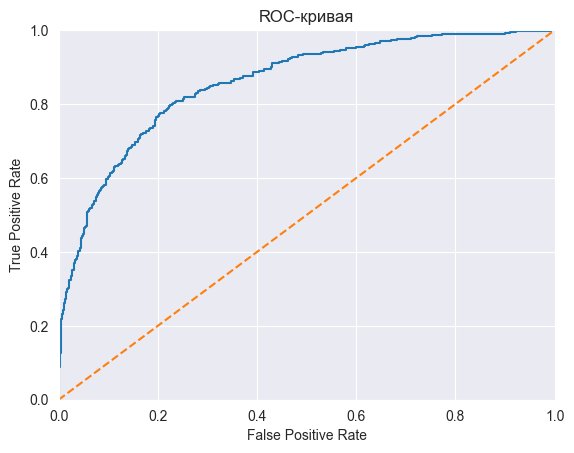

In [61]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

### Вывод
Показатель F1-меры на тестовой выборке = 0.6156. Значение чуть ниже, чем на валидационной выборке, но все же довольно высоко и соответствует условию поставленной задачи.

Полнота = 0.9091, что говорит о том, что модель очень хорошо предсказывает положительньые ответы.

AUC-ROC случайной модели = 0.5. AUC-ROC нашей модели = 0.858. Довольно высокий показатель, можно с уверенностью сказать, что модель предсказывает лучше, чем случайно построенная и может использоваться для предсказания поведения клиентов.

## Общий вывод

Были изучены данные о клиентах «Бета-Банка». На основе данных была построена модель, которая предсказывает, уйдет клиент из банка в ближайшее время или нет.

Данные были подготовлены к работе:
- Проверены на дубликаты и мультиколлинеарность. 
- Названия столбцов приведены к змеиному регистру.
- Пропуски в столбце `tenure` заполнены медианным значением, тип данных изменен на целочисленный.
- Удалены признаки, которые не понадобятся нам для обучения модели.

Исходные данные были разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Был выделен целевой признак `exited`.

Количественные признаки имели разный масштаб, поэтому они были масштабированы, чтобы модель не принимала значения с большими значениями за самые важные.

Так как перед нами стояла задача классификации, для построения моделей мы использовали три алгоритма: 
- Решающее дерево;
- Случайный лес;
- Логистическая регрессия. 

Было проведено обучение моделей без учета дисбаланса классов. Для оценки качества моделей были использованы метрики Recall, F1-мера и AUC-ROC. Результаты оказались следующими:
- Наилучшее значение F1-меры показала модель случайного леса (0.5897), тем не менее эта модель работает медленнее всех.
- Быстрее всего работает модель логистической регрессии, при этом выдавая самое низкое значение F1-меры.


Так как в целевом признаке присутствовал дисбаланс, мы применили следующие методы борьбы с дисбалансом: взвешивание классов, увеличение выборки, уменьшение выборки. 

Применяя каждый метод, мы снова построили модели с подбором гиперпараметров: решающее дерево, случайный лес и логистическую регрессию. Для оценки качества моделей также использовали Recall, F1-меру и AUC-ROC.

Наилучшее значение F1-меры (0.6294) показала **модель случайного леса** с количеством деревьев = 180 и глубиной дерева = 8, построенная при применении **метода взвешивания классов**. Значение AUC-ROC у данной модели также довольно высоко (0.8579), полнота = 0.6866 - модель неплохо предсказывает положительные ответы.  

Так как, исходя из подсчетов банковских маркетологов, принято решение сконцентрироваться на том, чтобы сохранять текущих клиентов, а не привлекать новых, рекомендуется заняться разработкой продуктов, которые смогут удержать клиентов в данном банке или, например, предложить более лояльные условия по кредиту или накопительным счетам. Чтобы не понести убытки и не раздавать скидки абсолютно всем клиентам, а сконцентрироваться именно на тех клиентах, которые думают об уходе из банка, рекомендуется использовать нашу модель. 

Для предсказания «Бета-Банком» поведения клиентов рекомендована следующая модель:
- модель случайного леса;
- количество деревьев = 180; 
- глубина дерева = 8;
- при дисбалансе целевого признака, рекомендуется использовать метод взвешивания классов.
F1-меры на тестовой выборке = 0.6156, что выше заданного условием задачи значения (0.59).
Значение полноты = 0.9091, что говорит о том, что модель научилась хорошо предсказывать положительные ответы и довольно точно может определить клиента, который собирается в ближайшее время уйти из банка.